Battery level study, but only interesting things
====

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
"""
Copy files from RDSF to a local directory so I can read them

"""

from ema import read

read.copy_battery_files()

In [5]:
"""
Create a dataframe of all the battery data

"""

battery_df = read.battery_lvl_df()
battery_df.head()

 36%|███▋      | 28/77 [00:00<00:00, 277.33it/s]

/home/mh19137/seaco_malaysia/data/battery_dbs/EMADATA_15082_20220420.db failed with Execution failed on sql 'SELECT * FROM Event;': database disk image is malformed
/home/mh19137/seaco_malaysia/data/battery_dbs/EMADATA_20050_20220412.db failed with Execution failed on sql 'SELECT * FROM Event;': database disk image is malformed
/home/mh19137/seaco_malaysia/data/battery_dbs/EMADATA_29061_20220628.db failed with Execution failed on sql 'SELECT * FROM Event;': database disk image is malformed
/home/mh19137/seaco_malaysia/data/battery_dbs/EMADATA_4260_20211221.db failed with Execution failed on sql 'SELECT * FROM Event;': database disk image is malformed
/home/mh19137/seaco_malaysia/data/battery_dbs/EMADATA_27345_20220615.db failed with Execution failed on sql 'SELECT * FROM Event;': database disk image is malformed
/home/mh19137/seaco_malaysia/data/battery_dbs/EMADATA_35272_20220520.db failed with Execution failed on sql 'SELECT * FROM Event;': database disk image is malformed
/home/mh191

100%|██████████| 77/77 [00:00<00:00, 310.97it/s]


/home/mh19137/seaco_malaysia/data/battery_dbs/EMADATA_9359_20220719.db failed with Execution failed on sql 'SELECT * FROM Event;': database disk image is malformed


/home/mh19137/seaco_malaysia/ema/clean.py:119: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Normal' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  copy.loc[start_time, col_name] = "Normal"
/home/mh19137/seaco_malaysia/ema/clean.py:190: UserWarning: Long catchup: not marking Meal at 2022-05-19 09:02:49 as catchup
  warnings.warn(


 Open ended catchup at 2022-02-11 20:02:05 ended by No response at 2022-02-12 08:02:11
 Open ended catchup at 2022-02-14 20:26:30 ended by No response at 2022-02-15 08:02:16
 Open ended catchup at 2022-04-19 08:01:14 ended by No catch-up at 2022-04-19 08:01:17
 Open ended catchup at 2022-06-27 15:53:14 ended by Catch-up start at 2022-06-27 15:54:06
 Open ended catchup at 2021-12-31 22:11:10 ended by No catch-up at 2022-01-01 08:01:15
 Open ended catchup at 2022-05-24 07:25:36 ended by Catch-up start at 2022-05-24 07:26:00
 Open ended catchup at 2022-03-21 08:01:57 ended by No catch-up at 2022-03-21 08:02:04
 Open ended catchup at 2022-03-07 18:33:30 ended by No catch-up at 2022-03-07 18:33:34
 Open ended catchup at 2022-03-07 18:37:08 ended by No catch-up at 2022-03-07 18:37:14
 Open ended catchup at 2022-03-07 19:29:23 ended by No response at 2022-03-08 08:02:56
 Open ended catchup at 2022-03-08 08:30:40 ended by No catch-up at 2022-03-08 08:31:08
 Open ended catchup at 2022-03-08 09:

,p_id,battery_lvl,delta,charges,discharges,respondent_sex,respondent_ethnicity,age_dob,residents_id,all_in_ramadan,any_in_ramadan,early_stop
0,765,72,1 days 08:00:40,6,6,1.0,1.0,17.0,765,True,True,False
1,765,72,1 days 08:00:40,6,6,1.0,1.0,17.0,765,True,True,False
2,765,72,1 days 08:00:40,6,6,1.0,1.0,17.0,765,True,True,False
3,765,72,1 days 08:00:40,6,6,1.0,1.0,17.0,765,True,True,False
4,765,72,1 days 08:00:40,6,6,1.0,1.0,17.0,765,True,True,False


In [6]:
"""
Make a dataframe that doesn't have delta and just has one row per participant

"""

unique_pid_df = (
    battery_df.copy().drop(columns=["delta", "battery_lvl"]).groupby("p_id").first()
)

unique_pid_df.head()

,charges,discharges,respondent_sex,respondent_ethnicity,age_dob,residents_id,all_in_ramadan,any_in_ramadan,early_stop
p_id,,,,,,,,,
141,6,7,2.0,1.0,9.0,141,True,True,False
765,6,6,1.0,1.0,17.0,765,True,True,False
924,3,4,2.0,3.0,17.0,924,False,False,False
1077,7,8,2.0,1.0,14.0,1077,False,False,False
1097,7,7,2.0,1.0,13.0,1097,False,False,False


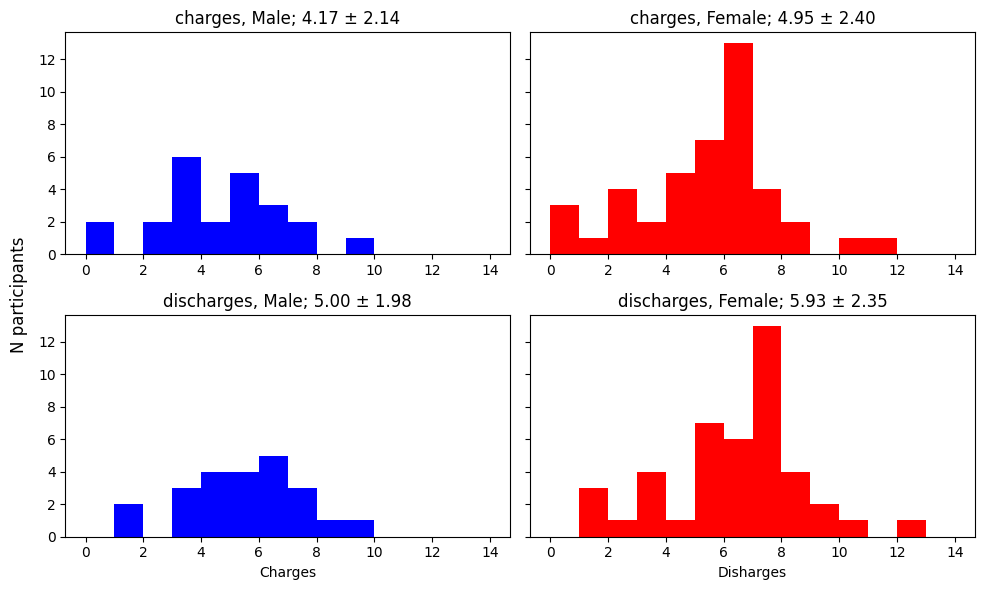

In [7]:
"""
Histogram of number of charging/discharging cycles by sex

"""

import os

import numpy as np
import matplotlib.pyplot as plt

img_dir = "img/battery_level2/"
if not os.path.exists(img_dir):
    os.makedirs(img_dir)

fig, axes = plt.subplots(2, 2, sharey=True, figsize=(10, 6))

hist_kw = {
    "bins": range(15),
    "histtype": "stepfilled",
    "linewidth": 2,
    "alpha": 1,
    "density": False,
}
for axs, col in zip(axes, ["charges", "discharges"]):
    for axis, sex in zip(axs, [1.0, 2.0]):
        data = unique_pid_df[unique_pid_df["respondent_sex"] == sex][col]
        axis.hist(data, **hist_kw, color="b" if sex == 1.0 else "r")

        mean, std = np.mean(data), np.std(data)
        axis.set_title(
            f"{col}, {'Male' if sex == 1.0 else 'Female'}; {mean:.2f} ± {std:.2f}"
        )

fig.supylabel("N participants")


axes[1, 0].set_xlabel("Charges")
axes[1, 1].set_xlabel("Disharges")

fig.tight_layout()
fig.savefig(f"{img_dir}/n_charge_discharge_hist.png")

In [8]:
from ema import clean

meal_df = clean.cleaned_smartwatch(keep_catchups=False)

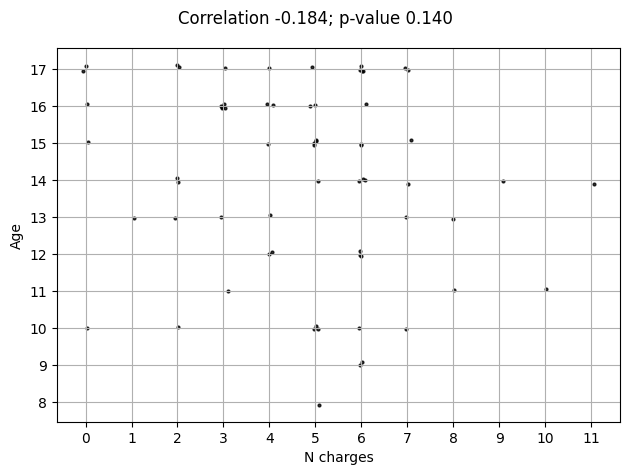

In [9]:
"""
Jitter plot of age vs. number of charging/discharging cycles

"""

from scipy.stats import pearsonr

corr, p_val = pearsonr(unique_pid_df["charges"], unique_pid_df["age_dob"])

rng = np.random.default_rng(0)

fig, axis = plt.subplots()
axis.scatter(
    unique_pid_df["charges"] + rng.normal(0, 0.05, len(unique_pid_df)),
    unique_pid_df["age_dob"] + rng.normal(0, 0.05, len(unique_pid_df)),
    s=4,
    alpha=0.8,
    color="k",
)
axis.set_xlabel("N charges")
axis.set_ylabel("Age")

axis.set_yticks(unique_pid_df["age_dob"].unique())
axis.set_xticks(unique_pid_df["charges"].unique())
axis.grid()

fig.suptitle(f"Correlation {corr:.3f}; p-value {p_val:.3f}")
fig.tight_layout()

fig.savefig(f"{img_dir}/n_charge_vs_age.png")

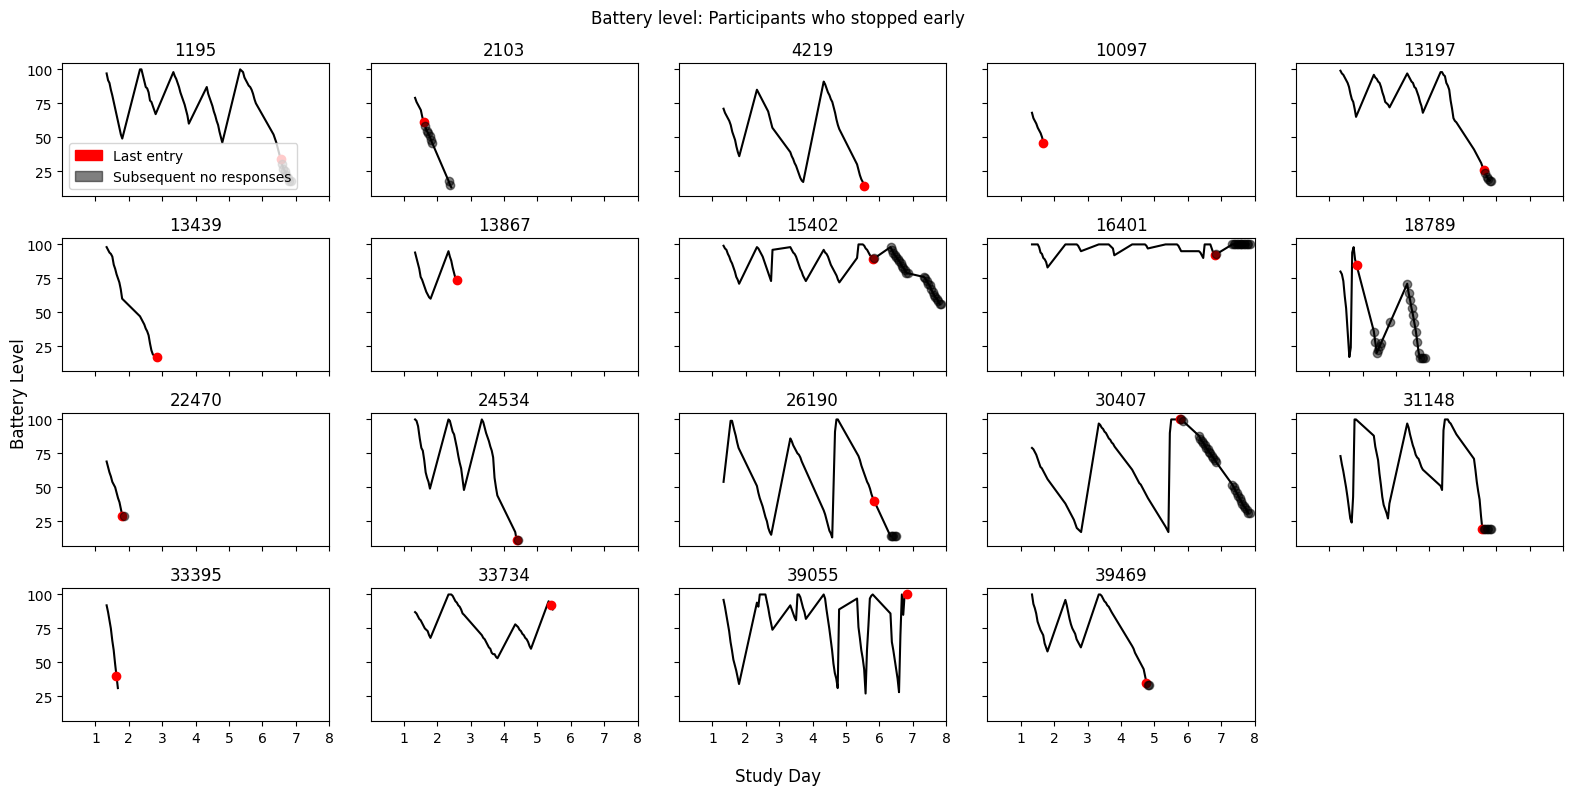

In [10]:
"""
Plot battery level for those who stopped early

"""

import pandas as pd
from matplotlib.patches import Patch
from scipy.interpolate import interp1d

fig, axes = plt.subplots(4, 5, sharex=True, sharey=True, figsize=(16, 8))

last_entry_early = []
for axis, p_id in zip(axes.flat, unique_pid_df[unique_pid_df["early_stop"]].index):
    battery_slice = battery_df[battery_df["p_id"] == p_id]
    meal_slice = meal_df[meal_df["p_id"] == p_id]

    # Plot battery level
    axis.plot(
        battery_slice["delta"].dt.total_seconds(),
        battery_slice["battery_lvl"],
        color="k",
    )

    # Find last positive entry
    last_pos = (
        meal_slice[
            meal_slice["meal_type"].isin({"Meal", "Drink", "Snack", "No food/drink"})
        ]["delta"]
        .dt.total_seconds()
        .max()
    )
    interp_fcn = interp1d(
        battery_slice["delta"].dt.total_seconds(),
        battery_slice["battery_lvl"],
        kind="linear",
    )
    try:
        interp_y = interp_fcn(last_pos)
    except ValueError:
        interp_y = battery_slice["battery_lvl"].iloc[-1]
        interp_fcn = lambda x: battery_slice["battery_lvl"].iloc[-1]
    axis.plot(last_pos, interp_y, "ro")
    last_entry_early.append([last_pos, interp_y])

    # Find subsequent negative entries
    subsequent_times = meal_slice[meal_slice["delta"].dt.total_seconds() > last_pos][
        "delta"
    ].dt.total_seconds()
    subsequent_y = []
    for time in subsequent_times:
        try:
            subsequent_y.append(interp_fcn(time))
        except ValueError:
            interp_fcn = lambda x: battery_slice["battery_lvl"].iloc[-1]
            subsequent_y.append(battery_slice["battery_lvl"].iloc[-1])

    axis.plot(subsequent_times, subsequent_y, "ko", alpha=0.5)

    # Axis limits - go up to 7 days
    axis.set_xlim(
        pd.to_timedelta("0 days").total_seconds(),
        pd.to_timedelta("7 days").total_seconds(),
    )

    # Label in days
    axis.set_xticks(
        pd.to_timedelta([f"{i} days" for i in range(1, 9)]).total_seconds(),
        range(1, 9),
    )
    axis.set_title(p_id)

axes.flat[-1].set_visible(False)
axes[0, 0].legend(
    handles=[
        Patch(color="red", label="Last entry"),
        Patch(color="black", label="Subsequent no responses", alpha=0.5),
    ]
)

fig.supxlabel("Study Day")
fig.supylabel("Battery Level")
fig.suptitle("Battery level: Participants who stopped early")

fig.tight_layout()
fig.savefig(f"{img_dir}/battery_lvl_early_stop.png")

100%|██████████| 47/47 [00:00<00:00, 106.97it/s]


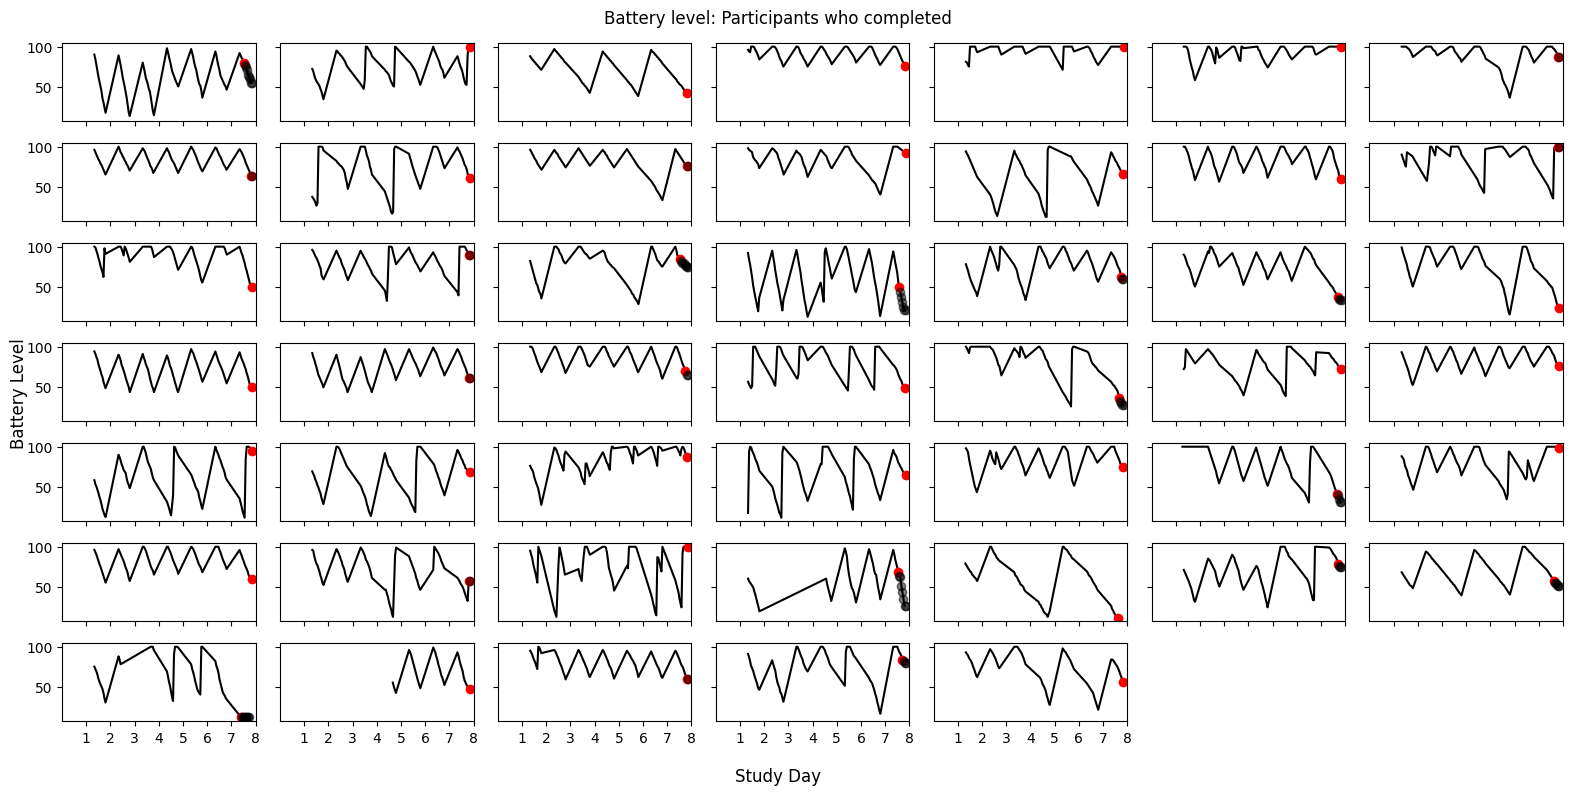

In [11]:
"""
Do the same for those who didn't stop early

"""

from tqdm import tqdm

fig, axes = plt.subplots(7, 7, sharex=True, sharey=True, figsize=(16, 8))

last_entry_normal = []
for axis, p_id in tqdm(
    zip(axes.flat[:-2], unique_pid_df[~unique_pid_df["early_stop"]].index), total=47
):
    battery_slice = battery_df[battery_df["p_id"] == p_id]
    meal_slice = meal_df[meal_df["p_id"] == p_id]

    # Plot battery level
    axis.plot(
        battery_slice["delta"].dt.total_seconds(),
        battery_slice["battery_lvl"],
        color="k",
    )

    # Find last positive entry
    last_pos = (
        meal_slice[
            meal_slice["meal_type"].isin({"Meal", "Drink", "Snack", "No food/drink"})
        ]["delta"]
        .dt.total_seconds()
        .max()
    )
    interp_fcn = interp1d(
        battery_slice["delta"].dt.total_seconds(),
        battery_slice["battery_lvl"],
        kind="linear",
    )
    try:
        interp_y = interp_fcn(last_pos)
    except ValueError:
        interp_y = battery_slice["battery_lvl"].iloc[-1]
        interp_fcn = lambda x: battery_slice["battery_lvl"].iloc[-1]
    axis.plot(last_pos, interp_y, "ro")
    last_entry_normal.append([last_pos, interp_y])

    # Find subsequent negative entries
    subsequent_times = meal_slice[meal_slice["delta"].dt.total_seconds() > last_pos][
        "delta"
    ].dt.total_seconds()
    subsequent_y = []
    for time in subsequent_times:
        try:
            subsequent_y.append(interp_fcn(time))
        except ValueError:
            interp_fcn = lambda x: battery_slice["battery_lvl"].iloc[-1]
            subsequent_y.append(battery_slice["battery_lvl"].iloc[-1])

    axis.plot(subsequent_times, subsequent_y, "ko", alpha=0.5)

    # Axis limits - go up to 7 days
    axis.set_xlim(
        pd.to_timedelta("0 days").total_seconds(),
        pd.to_timedelta("7 days").total_seconds(),
    )

# Label in days
axis.set_xticks(
    pd.to_timedelta([f"{i} days" for i in range(1, 9)]).total_seconds(),
    range(1, 9),
)

for axis in axes.flat[-2:]:
    axis.set_visible(False)

fig.supxlabel("Study Day")
fig.supylabel("Battery Level")
fig.suptitle("Battery level: Participants who completed")

fig.tight_layout()
fig.savefig(f"{img_dir}/battery_lvl_non_early_stop.png")

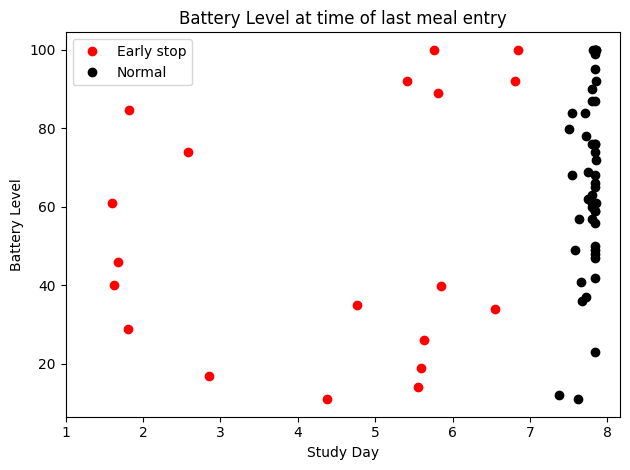

In [12]:
"""
Scatter plot of battery level at the last entry vs time

"""

fig, axis = plt.subplots()

axis.plot(
    [i[0] for i in last_entry_early],
    [i[1] for i in last_entry_early],
    "ro",
    label="Early stop",
)
axis.plot(
    [i[0] for i in last_entry_normal],
    [i[1] for i in last_entry_normal],
    "ko",
    label="Normal",
)

axis.set_xticks(
    pd.to_timedelta([f"{i} days" for i in range(1, 9)]).total_seconds(),
    range(1, 9),
)
axis.set_xlabel("Study Day")
axis.set_ylabel("Battery Level")
axis.set_title("Battery Level at time of last meal entry")

axis.legend()

fig.tight_layout()
fig.savefig(f"{img_dir}/battery_lvl_last_entry.png")

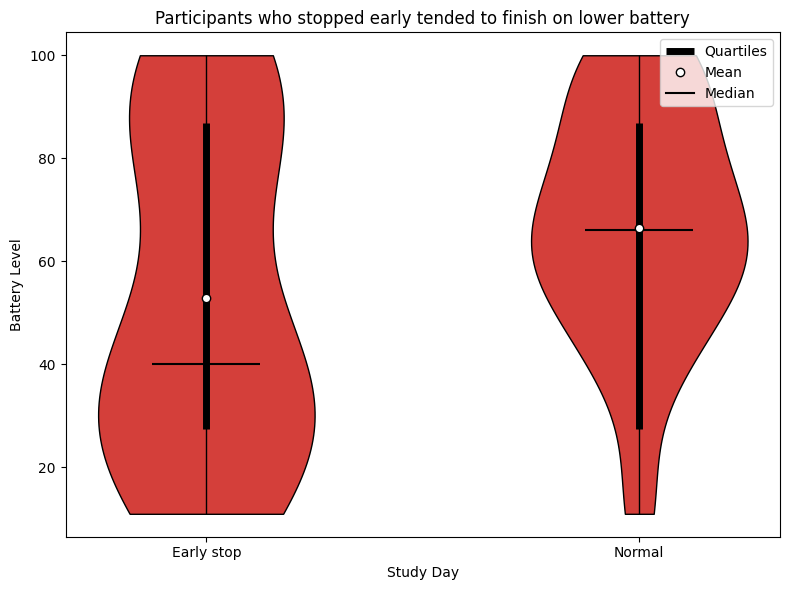

In [52]:
"""
Box plot of battery level at the last entry vs time

"""
from matplotlib.lines import Line2D

fig, axis = plt.subplots(1, 1, figsize=(8, 6))

# Get lists of battery levels
early = [i[1] if isinstance(i[1], int) else float(i[1]) for i in last_entry_early]
normal = [i[1] if isinstance(i[1], int) else float(i[1]) for i in last_entry_normal]

parts = axis.violinplot(
    [early, normal], showmeans=False, showmedians=True, showextrema=False
)

# Change colour
for polycollection in parts["bodies"]:
    polycollection.set_facecolor("#D43F3A")
    polycollection.set_edgecolor("black")
    polycollection.set_alpha(1)
parts["cmedians"].set_color("black")

# Mark quartiles
early_quartiles = np.percentile(early, [25, 75])
normal_quartiles = np.percentile(normal, [25, 75])
axis.vlines(
    [1, 2], early_quartiles[0], early_quartiles[1], "k", linewidth=5, label="Quartiles"
)

# Draw a line connecting extrema
axis.vlines([1, 2], min(early), max(early), "k", linewidth=1)

# Mark mean
axis.plot(
    [1, 2], [np.mean(early), np.mean(normal)], "wo", label="Mean", markeredgecolor="k"
)

axis.set_xticks([1, 2], ["Early stop", "Normal"])
axis.set_xlabel("Study Day")
axis.set_ylabel("Battery Level")
axis.set_title("Participants who stopped early tended to finish on lower battery")

handles, _ = axis.get_legend_handles_labels()
axis.legend(handles=handles + [Line2D([0], [0], color="k", label="Median")])

fig.tight_layout()
fig.savefig(f"{img_dir}/battery_lvl_last_entry_boxplot.png")